# SC1003 Group 5 Project Details

# INTRODUCTION

# ALGORITHM EVALUATION

# Step 1: Import all the things we need
1. `import csv`
    - Used to read from and write to CSV files.

2. `from pathlib import Path`
    - Provides an object-oriented way to handle file system paths.

3. `import random` (OPTIONAL)
    - Enables random number generation and random selection/shuffling.

4. `import matplotlib.pyplot as plt`
    - Used for data visualization.

5. `import statistics`
    - Provides functions for basic statistical calculations.

6. `import seaborn as sns`
    - Creates more attractive and complex statistical plots easily.

7. `import math`
    - Used for numerical calculations and formulas.

8. `from IPython.display import display`
    - Used to display objects (like DataFrames or plots) in a readable format.

9. `from collections import defaultdict`
    - A special dictionary subclass that automatically initializes missing keys with a default value.

In [125]:
# IMPORT EVERYTHING
import csv
from pathlib import Path
import random 
import matplotlib.pyplot as plt # Data Visualisation
import statistics
import seaborn as sns
import math
from IPython.display import display
from collections import defaultdict

# Step 2: GPA Categorization

Overview:

  - Responsible for analyzing students’ CGPAs, dividing them into performance categories (High, Mid, and Low), and updating the dataset accordingly.

  - The categorization is done within each group independently using percentile-based thresholds, ensuring fair comparison among students in the same group.


Percentile Function:

   - Calculates the q-th percentile of a sorted numerical dataset using linear interpolation.

   - This function is used later to compute the 33rd and 67th percentile cutoffs for CGPAs.


Computing Quartile Boundaries:

  - Determines GPA thresholds that divide each group’s students into three performance categories.

  - As a result, `quartiles` holds a pair of GPA cutoff values for each group.


Label Assignment Function:

  - Assigns a categorical label based on how a student’s CGPA compares to the group thresholds.
  
    `HI` → CGPA is above or equal to the upper threshold.

    `LO` → CGPA is below the lower threshold.

    `MID` → CGPA is between the two thresholds.

Bucketizing CGPAs:

  - Transforms all CGPA values into categorical labels (`HI`, `MID`, `LO`) directly within the data structure.

  - Uses `percentile()` to recompute thresholds per group.

  - Uses `_label()` to determine each student’s category.

  - Then, call it to apply categorization to the full dataset.

Verifying Results:

  - Performs a quick verification by printing the first five CGPA labels of the first group.

Outcome:

Every student in the dataset is automatically assigned a GPA category of HI, MID, or LO, based on calculated percentile thresholds.

## Pseudocode:

    FUNCTION percentile(data, q)
        n ← length of data
        pos ← (n - 1) × q
        lo ← integer part of pos
        hi ← minimum of (lo + 1, n - 1)
        frac ← pos - lo
        RETURN data[lo] × (1 - frac) + data[hi] × frac
    END FUNCTION

    CREATE empty dictionary quartiles

    FOR EACH group_name, students IN rows
        gpas ← list of CGPA values from students
        q1 ← percentile(gpas, 0.33)
        q2 ← percentile(gpas, 0.67)
        quartiles[group_name] ← [q1, q2]
    END FOR

    PRINT quartiles

    FUNCTION _label(cg, low, high)
        IF cg ≥ high THEN
            RETURN "HI"
        ELSE IF cg < low THEN
            RETURN "LO"
        ELSE
            RETURN "MID"
    END FUNCTION
    
    FUNCTION bucketize_cgpa_in_place(rows, low_q, high_q)
        FOR EACH group_name, students IN rows
            nums ← list of students' CGPA values converted to float
            SORT nums in ascending order

            low ← percentile(nums, low_q)
            high ← percentile(nums, high_q)

            FOR EACH student IN students
                student["CGPA"] ← _label(student["CGPA"], low, high)
            END FOR
        END FOR
    END FUNCTION

    CALL bucketize_cgpa_in_place(rows)

    FOR EACH group_name, students IN rows
        PRINT group_name and first 5 students' CGPA labels
        BREAK  // only show first group
    END FOR

In [126]:
def percentile(data, q):
    n = len(data)
    pos = (n - 1) * q
    lo = int(pos)
    hi = min(lo + 1, n - 1)
    frac = pos - lo
    return data[lo] * (1 - frac) + data[hi] * frac

In [127]:
# Read and process the "records.csv" file
import csv

rows = {}
with open("records.csv", "r", newline="", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        tg = row["Tutorial Group"].strip()
        # Each student exists as a dictionary
        student = {k: v for k, v in row.items() if k != "Tutorial Group"}

        # Extract CGPAs as floats
        student['CGPA'] = float(student['CGPA'])

        # Allows for the first student of each tutorial group read by the reader to be assigned into a new list
        rows.setdefault(tg, []).append(student)


In [128]:
quartiles = {}
for group_name, students in rows.items():
    gpas = [student['CGPA'] for student in students]
    q1 = percentile(gpas, 0.33)
    q2 = percentile(gpas, 0.67)
    quartiles[group_name] = [q1, q2]

print(quartiles)

{'G-1': [4.0964, 4.222600000000001], 'G-10': [4.1511, 4.061699999999999], 'G-100': [4.1168000000000005, 4.1915000000000004], 'G-101': [4.0868, 4.0587], 'G-102': [4.1251, 4.1183], 'G-103': [4.067400000000001, 4.083799999999998], 'G-104': [4.0321, 4.1053], 'G-105': [4.0017, 3.9175999999999984], 'G-106': [4.0421, 4.176400000000001], 'G-107': [4.057, 4.117199999999999], 'G-108': [4.0302, 4.0183], 'G-109': [4.1813, 4.0219], 'G-11': [4.0302, 4.257500000000001], 'G-110': [4.0168, 3.982299999999999], 'G-111': [3.9295000000000004, 4.067399999999999], 'G-112': [4.1417, 4.1002], 'G-113': [4.0998, 4.145099999999999], 'G-114': [4.0423, 4.008100000000001], 'G-115': [4.0127999999999995, 4.0681], 'G-116': [4.0619, 4.436700000000003], 'G-117': [3.9891000000000005, 4.626300000000003], 'G-118': [4.1089, 4.1496], 'G-119': [4.0385, 4.127900000000001], 'G-12': [4.0736, 4.467300000000002], 'G-120': [4.183, 4.1381000000000006], 'G-13': [3.9523000000000006, 4.053599999999999], 'G-14': [4.02, 4.049400000000001]

In [129]:
def _label(cg, low, high):
    if cg >= high:
        return "HI"
    if cg < low:
        return "LO"
    return "MID"

def bucketize_cgpa_in_place(rows, low_q=0.33, high_q=0.66):
    for grp, students in rows.items():
        # collect numeric CGPAs
        nums = [float(s["CGPA"]) for s in students]
        nums.sort()
        low = percentile(nums, low_q)
        high = percentile(nums, high_q)

        # overwrite CGPA with bucket label
        for s in students:
            s["CGPA"] = _label(float(s["CGPA"]), low, high)

bucketize_cgpa_in_place(rows)

for grp, lst in rows.items():
    print(grp, [s["CGPA"] for s in lst[:5]])
    break

G-1 ['LO', 'MID', 'HI', 'LO', 'MID']


# Step 3: Grouping by Tutorial Group

Processing `records.csv` and Grouping Students

Open and read file:
  - Use `records.csv` to access student data.  
  - Read the file using `csv.DictReader()` to process it row by row.

Create a dictionary structure: 
  - Initialize an empty dictionary called `rows`.  
  - Each key represents a Tutorial Group (e.g., “TG-01”).  
  - Each value is a list of student dictionaries containing that group’s members.

Store student information:
  - For each student, extract fields such as Student ID, School, Gender, and CGPA.  
  - Exclude the "Tutorial Group" field from the inner dictionary since it’s already used as the key.
  
Convert CGPA values: 
  - Use the function `gpa_to_threshold()` to convert numeric CGPA values into categorical levels:  
    - HI (High)  
    - MID (Medium)  
    - LO (Low)  
  - Update each student’s record with their CGPA category instead of the numeric value.

Organize by tutorial group:  
  - Append each updated student dictionary into its corresponding tutorial group list within **`rows`**.

Generate output:
  - Print the final `rows` dictionary.  
  - The output shows all tutorial groups and the students assigned under each, making the data easier to access for later processing steps (like team formation).

## Pseudocode:

    // Calculate GPA boundaries with previous function
    CALL cgpa_boundary("records.csv")


    // Initialize a dictionary to store students grouped by Tutorial Group
    rows = {}


    // Read and process the "records.csv" file
    WITH open("records.csv", "r", newline="", encoding="utf-8") AS f:
    reader = csv.DictReader(f)
    FOR each row IN reader:
        // Extract and clean the Tutorial Group name
        tg = row["Tutorial Group"].strip()
        // Create a student dictionary excluding the Tutorial Group field
        student = {k: v FOR k, v IN row.items() IF k != "Tutorial Group"}


        // Replace CGPA value with its group label (HI / MID / LO)
        student["CGPA"] = gpa_to_threshold(float(row["CGPA"]))
        // Add the student to the corresponding Tutorial Group list in 'rows'
        rows.setdefault(tg, []).append(student)


      //Output dictionary
      PRINT(rows)

In [130]:
rows = {}
with open("records.csv", "r", newline="", encoding="utf-8") as f:
    reader = csv.DictReader(f)
    for row in reader:
        tg = row["Tutorial Group"].strip()
        # Each student exists as a dictionary right now
        student = {k: v for k, v in row.items() if k != "Tutorial Group"}

        # Extract CGPAs as floats
        student['CGPA'] = float(student['CGPA'])

        # Allows for the first student of each tutorial group read by the reader to be assigned into a new list
        rows.setdefault(tg, []).append(student)

print(rows)

{'G-1': [{'Student ID': '5002', 'School': 'CCDS', 'Name': 'Aarav Singh', 'Gender': 'Male', 'CGPA': 4.02}, {'Student ID': '3838', 'School': 'EEE', 'Name': 'Aarti Nair', 'Gender': 'Female', 'CGPA': 4.05}, {'Student ID': '2091', 'School': 'EEE', 'Name': 'Adlan Bin Rahman', 'Gender': 'Male', 'CGPA': 4.2}, {'Student ID': '288', 'School': 'CoB (NBS)', 'Name': 'Ajay Verma', 'Gender': 'Male', 'CGPA': 4.01}, {'Student ID': '4479', 'School': 'CCDS', 'Name': 'Amelia Kim', 'Gender': 'Female', 'CGPA': 4.11}, {'Student ID': '5708', 'School': 'SoH', 'Name': 'Ananya Ramesh', 'Gender': 'Male', 'CGPA': 4.2}, {'Student ID': '4563', 'School': 'WKW SCI', 'Name': 'Anjali Patel', 'Gender': 'Female', 'CGPA': 4.01}, {'Student ID': '3989', 'School': 'WKW SCI', 'Name': 'Anthony Liu', 'Gender': 'Male', 'CGPA': 4.15}, {'Student ID': '2115', 'School': 'EEE', 'Name': 'Anya Kumar', 'Gender': 'Female', 'CGPA': 4.03}, {'Student ID': '1383', 'School': 'CoB (NBS)', 'Name': 'Areeba Khan', 'Gender': 'Female', 'CGPA': 4.19}

In [131]:
for i in rows.values():
  for j in i:
    print(j)

{'Student ID': '5002', 'School': 'CCDS', 'Name': 'Aarav Singh', 'Gender': 'Male', 'CGPA': 4.02}
{'Student ID': '3838', 'School': 'EEE', 'Name': 'Aarti Nair', 'Gender': 'Female', 'CGPA': 4.05}
{'Student ID': '2091', 'School': 'EEE', 'Name': 'Adlan Bin Rahman', 'Gender': 'Male', 'CGPA': 4.2}
{'Student ID': '288', 'School': 'CoB (NBS)', 'Name': 'Ajay Verma', 'Gender': 'Male', 'CGPA': 4.01}
{'Student ID': '4479', 'School': 'CCDS', 'Name': 'Amelia Kim', 'Gender': 'Female', 'CGPA': 4.11}
{'Student ID': '5708', 'School': 'SoH', 'Name': 'Ananya Ramesh', 'Gender': 'Male', 'CGPA': 4.2}
{'Student ID': '4563', 'School': 'WKW SCI', 'Name': 'Anjali Patel', 'Gender': 'Female', 'CGPA': 4.01}
{'Student ID': '3989', 'School': 'WKW SCI', 'Name': 'Anthony Liu', 'Gender': 'Male', 'CGPA': 4.15}
{'Student ID': '2115', 'School': 'EEE', 'Name': 'Anya Kumar', 'Gender': 'Female', 'CGPA': 4.03}
{'Student ID': '1383', 'School': 'CoB (NBS)', 'Name': 'Areeba Khan', 'Gender': 'Female', 'CGPA': 4.19}
{'Student ID': '1

# Step 4: Randomization (optional)

Purpose:  
  - The random function is used to shuffle the order of students within each tutorial group.  
  - This helps create a more varied and less predictable output.

When to use it:  
  - If you want the final output to appear in a randomized (disordered) order, simply remove the `#` comment symbol in front of `randomise()` to activate the function.  
  - This will cause the student lists to be shuffled randomly each time the code runs.

When not to use it: 
  - If you prefer the output to remain ordered (so that students in the same group appear together and in sequence), leave the `randomise()` line commented out.  
  - In this case, the random function will not be executed, and the output remains structured and consistent.

Effect:
  - Using randomization helps test the robustness of the algorithm, while keeping it disabled ensures predictable and easier-to-read output.

Pseudocode:

    // Optional function to randomize student order within tutorial groups
    FUNCTION randomise():
    FOR each group IN rows.values():
        random.shuffle(group)


    // Optional call to randomise
    randomise()

In [132]:
def randomise():
  for groups in rows.values():
    random.shuffle(groups)

# Step 5: Ordering Tutorial Groups

It takes the keys from the rows dictionary (each key is a tutorial group name), converts them to strings, sorts them alphabetically, stores the result in `tutorial_groups`, then prints that list.

Purpose: Show or provide an ordered list of all unique tutorial groups present in the data so later code can iterate over them in a predictable order.

## Pseudocode:

        // Provide a list of all tutorial groups
        tutorial_groups = sorted(list(str(value) for value in rows.keys()))
        //output list
        PRINT(tutorial_groups)

In [133]:
# Getting a list of all the UNIQUE tutorial group names
tutorial_groups = sorted(list(str(value) for value in rows.keys()))
print(tutorial_groups)

['G-1', 'G-10', 'G-100', 'G-101', 'G-102', 'G-103', 'G-104', 'G-105', 'G-106', 'G-107', 'G-108', 'G-109', 'G-11', 'G-110', 'G-111', 'G-112', 'G-113', 'G-114', 'G-115', 'G-116', 'G-117', 'G-118', 'G-119', 'G-12', 'G-120', 'G-13', 'G-14', 'G-15', 'G-16', 'G-17', 'G-18', 'G-19', 'G-2', 'G-20', 'G-21', 'G-22', 'G-23', 'G-24', 'G-25', 'G-26', 'G-27', 'G-28', 'G-29', 'G-3', 'G-30', 'G-31', 'G-32', 'G-33', 'G-34', 'G-35', 'G-36', 'G-37', 'G-38', 'G-39', 'G-4', 'G-40', 'G-41', 'G-42', 'G-43', 'G-44', 'G-45', 'G-46', 'G-47', 'G-48', 'G-49', 'G-5', 'G-50', 'G-51', 'G-52', 'G-53', 'G-54', 'G-55', 'G-56', 'G-57', 'G-58', 'G-59', 'G-6', 'G-60', 'G-61', 'G-62', 'G-63', 'G-64', 'G-65', 'G-66', 'G-67', 'G-68', 'G-69', 'G-7', 'G-70', 'G-71', 'G-72', 'G-73', 'G-74', 'G-75', 'G-76', 'G-77', 'G-78', 'G-79', 'G-8', 'G-80', 'G-81', 'G-82', 'G-83', 'G-84', 'G-85', 'G-86', 'G-87', 'G-88', 'G-89', 'G-9', 'G-90', 'G-91', 'G-92', 'G-93', 'G-94', 'G-95', 'G-96', 'G-97', 'G-98', 'G-99']


# Step 6: Calculating Team Diversity Score

Define helper function `_safe_div(a, b)`
  - Returns `0.0` if `b` is 0, otherwise returns `a / b`.  
  - Purpose: Prevents division-by-zero errors in diversity calculations.

Define function `check_diversity(group_stats)` 
  - Computes a single diversity score for a team (value between 0 and 1) by combining three measurements:

  1. School Diversity (50% weight) 
     - Measures the fraction of unique schools in the team.  
     - Higher value → more schools represented → more diverse background.

  2. Gender Diversity (30% weight) 
     - Rewards a balanced male/female mix.  
     - Closer to 1 → better gender balance.
     - Formula: {Gender Diversity} = 1 - {Male Count} - {Female Count} / {Team Size}


  3. CGPA Diversity (20% weight)  
     - Measures spread of CGPA categories (HI, MID, LO).  
     - Value 1 → all three levels present; value 0 → none present.
     - Formula: {CGPA Diversity} = {Number of Distinct CGPA Levels Present} / {3}


Combine all factors:
  - Weighted sum: {Total Diversity} = 0.5 x {School Diversity} + 0.3 x {Gender Diversity} + 0.2 x {CGPA Diversity}

  - Returns a number between 0.0 and 1.0, higher score means more diverse team.

In [134]:
# Prevents zerodiv error
def _safe_div(a, b):
    return 0.0 if b == 0 else a / b

# returns a value between 0 and 1 
def check_diversity(group_stats):
  team_size = len(list(group_stats['School']))
  unique_schools = len(set(group_stats['School']))
  school_diversity = _safe_div(unique_schools, team_size) # result should be 1; any less means dulplicates

  male = group_stats['Gender']['Male']
  female = group_stats['Gender']['Female']
  gender_diversity = 1 - _safe_div(male-female, team_size) # Male to female ratio; the closer to 1 the better

  cgpa_diversity = len([c for c in group_stats['CGPA'] if group_stats['CGPA'][c] > 0]) / 3 # The closer to 1 the better

  return 0.5 * school_diversity + 0.3 * gender_diversity + 0.2 * cgpa_diversity # Adjust the ratios to see fit


# Step 7: Updating Team Statistics with `update_stats_list(base, student)`

- Purpose:
  - Adds a single student's information into a running team statistics structure.

- Steps performed by the function:

  1. Add Student ID  
     - Appends the student's ID to the team's `base['Student ID']` list.

  2. Add School 
     - Appends the student's school to the team's `base['School']` list.

  3. Update Gender Count 
     - Increments the count for the student's gender (`Male` or `Female`) in `base['Gender']`.

  4. Update CGPA Count 
     - Increments the count for the student's CGPA category (`HI`, `MID`, or `LO`) in `base['CGPA']`.

  5. Return Updated Base  
     - Returns the updated `base` object with the student's information included.

In [135]:
def update_stats_list(base, student):

    base['Student ID'].append(student['Student ID'])

    # School: keep a list; append and keep the list in 'out'
    base['School'].append(student['School'])

    # Gender: increment the matching bucket
    g = student['Gender']
    base['Gender'][g] = base['Gender'].get(g, 0) + 1

    # CGPA: increment the matching bucket
    c = student['CGPA']
    base['CGPA'][c] = base['CGPA'].get(c, 0) + 1

    return base

# Step 8: Assigning Students to Teams:

1. `make_team()` Function 
   - Returns an empty team structure with fields for Student ID, School, Gender, and CGPA counts.

2. Normalize Gender Function  
   - Standardizes gender labels to either `"Male"` or `"Female"`.
   - Takes any string representing gender.
     - Converts input to lowercase and strips whitespace.
     - Checks if the string starts with `"m"`.
     - Returns `"Male"` if the input starts with `"m"`.
     - Returns `"Female"` otherwise.

3. Normalize CGPA Bucket Function 
   - Ensures CGPA classification is standardized as `"HI"`, `"MID"`, or `"LO"`.
   - Converts input to uppercase and strips whitespace.
   - Checks if the value is one of `"HI"`, `"MID"`, `"LO"`.

4. Team Assignment
    - Team Initialization
        - Creates teams_per_group empty teams for each group using `make_team()`.

    - Student Processing
        - Limits students per group.
        - Cleans and normalizes student data:
        - Strips whitespace from school name.
        - Normalizes gender using `normalize_gender`.
        - Normalizes CGPA bucket using `normalize_cgpa_bucket`.

    - For each student:

        1. Simulates adding the student to each team that is not full.

        2. Updates temporary gender and CGPA counts for scoring.

        3. Calculates a diversity score using check_diversity.

        4. Chooses the team with the highest diversity score.

        5. If all teams are full, assigns to the team with the fewest students.

    - Updating Team Stats
        - Adds the student to the chosen team using `update_stats_list`.

    - Returns `pseudo_out`, a dictionary mapping each group to its list of populated teams.

5. Display team output
    - Calls `update_pseudo_out(rows)` to create teams with balanced diversity.
    - Loops through each group in pseudo_out.
    - Displays the group identifier.
    - Loops through each team within the group.
    - Prints:
        - Team Number
        - Team Size
        - Gender Distribution
        - CGPA Distribution

In [136]:
def make_team():
    """Create an empty team."""
    return {
        "Student ID": [],
        "School": [],
        "Gender": {"Male": 0, "Female": 0},
        "CGPA": {"HI": 0, "MID": 0, "LO": 0}
    }

def normalize_gender(gender):
    """Convert gender labels to 'Male' or 'Female'."""
    g = str(gender).strip().lower()
    return "Male" if g.startswith("m") else "Female"

def normalize_cgpa_bucket(cgpa):
    """Ensure CGPA level is HI, MID, or LO."""
    c = str(cgpa).strip().upper()
    return c if c in ("HI", "MID", "LO") else "MID"

In [137]:
def update_pseudo_out(rows, teams_per_group=10, team_capacity=5, limit_per_group=None):
    pseudo_out = {}

    for group, students in rows.items():
        pseudo_out[group] = [make_team() for _ in range(teams_per_group)]
        if limit_per_group:
            students = students[:limit_per_group]

        for student in students:
            # clean data
            s = dict(student)
            s["School"] = s.get("School", "").strip()
            s["Gender"] = normalize_gender(s["Gender"])
            s["CGPA"] = normalize_cgpa_bucket(s["CGPA"])

            best_team_idx = None
            best_score = -1

            # find best team based on diversity
            for i, team in enumerate(pseudo_out[group]):
                if len(team["School"]) >= team_capacity:
                    continue

                simulated = {
                    "School": team["School"] + [s["School"]],
                    "Gender": team["Gender"].copy(),
                    "CGPA": team["CGPA"].copy()
                }
                simulated["Gender"][s["Gender"]] += 1
                simulated["CGPA"][s["CGPA"]] += 1

                score = check_diversity(simulated)
                if score > best_score:
                    best_score = score
                    best_team_idx = i

            # fallback: smallest team if all full
            if best_team_idx is None:
                open_teams = [i for i, t in enumerate(pseudo_out[group])
                              if len(t["School"]) < team_capacity]
                pool = open_teams or range(teams_per_group)
                best_team_idx = min(pool, key=lambda i: len(pseudo_out[group][i]["School"]))

            # add student to chosen team
            update_stats_list(pseudo_out[group][best_team_idx], s)

    return pseudo_out

In [138]:
pseudo_out = update_pseudo_out(rows)
for g, teams in pseudo_out.items():
    print(g)
    for idx, t in enumerate(teams):
        print(f" Team {idx + 1}: size={len(t['School'])}, gender={t['Gender']}, cgpa={t['CGPA']}")


G-1
 Team 1: size=5, gender={'Male': 1, 'Female': 4}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 2: size=5, gender={'Male': 3, 'Female': 2}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 3: size=5, gender={'Male': 3, 'Female': 2}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 4: size=5, gender={'Male': 2, 'Female': 3}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 5: size=5, gender={'Male': 2, 'Female': 3}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 6: size=5, gender={'Male': 2, 'Female': 3}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 7: size=5, gender={'Male': 1, 'Female': 4}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 8: size=5, gender={'Male': 2, 'Female': 3}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 9: size=5, gender={'Male': 3, 'Female': 2}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 10: size=5, gender={'Male': 2, 'Female': 3}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
G-10
 Team 1: size=5, gender={'Male': 5, 'Female': 0}, cgpa={'HI': 0, 'MID': 5, 'LO': 0}
 Team 2: size=5, gender={'Male': 2, 'Female': 3}, cgpa={'HI': 0, '

# Step 9: Output Generation
Open CSV files:  
  - Open the original CSV `records.csv` for reading.  
  - Create a new CSV `groupings.csv` for writing.  
  - Copy the original CSV header and add an extra column named "Group".

Assign students to groups in the new CSV:  
  - For each student row in `records.csv`:  
    - Find the matching tutorial group in the in-memory `pseudo_out` structure (which holds all teams).  
    - Scan the 10 teams for that tutorial group to check which team contains the student's ID.  
    - Update row:  
      - Set `row["Group"]` to the corresponding team number (1–10).  
      - Write the row to `groupings.csv`.


Verification: 
  - After writing, re-open `groupings.csv` and print each row to inspect the output.  
  - If a student is not found in any team, their row is not written to the new CSV.

## Pseudocode:

    //INITIALIZE empty dictionary group_lookup

    FOR each tutorial_group_name, groups_list IN pseudo_out:
        FOR each group_index, group_dict IN groups_list:
            FOR each student_id IN group_dict["Student ID"]:
                ADD entry to group_lookup with key (tutorial_group_name, student_id)
                VALUE = group_index + 1   # since group numbers start from 1

In [139]:
# Copy the old csv, make a new csv with an additional column
src = Path("records.csv")
dst = Path("FDDA_Team5_Reuben.csv")

with src.open(newline="", encoding="utf-8") as fin, dst.open("w", newline="", encoding="utf-8") as fout:
  reader = csv.DictReader(fin)
  fieldnames = reader.fieldnames + ["Group"]
  writer = csv.DictWriter(fout, fieldnames=fieldnames)
  writer.writeheader()

  for row in reader:
    for tg_name, grps in pseudo_out.items():
      if tg_name == row['Tutorial Group']:
        for i in range(10):
          if row['Student ID'] in grps[i]['Student ID']:
            row["Group"] = str(i+1)
            writer.writerow(row)

with dst.open(newline = "", encoding = 'utf-8') as f:
  reader = csv.DictReader(f)
  for i in reader:
    print(i)

print(f"File saved in Excel-friendly CSV format as {dst}")

{'Tutorial Group': 'G-1', 'Student ID': '5002', 'School': 'CCDS', 'Name': 'Aarav Singh', 'Gender': 'Male', 'CGPA': '4.02', 'Group': '1'}
{'Tutorial Group': 'G-1', 'Student ID': '3838', 'School': 'EEE', 'Name': 'Aarti Nair', 'Gender': 'Female', 'CGPA': '4.05', 'Group': '2'}
{'Tutorial Group': 'G-1', 'Student ID': '2091', 'School': 'EEE', 'Name': 'Adlan Bin Rahman', 'Gender': 'Male', 'CGPA': '4.2', 'Group': '2'}
{'Tutorial Group': 'G-1', 'Student ID': '288', 'School': 'CoB (NBS)', 'Name': 'Ajay Verma', 'Gender': 'Male', 'CGPA': '4.01', 'Group': '2'}
{'Tutorial Group': 'G-1', 'Student ID': '4479', 'School': 'CCDS', 'Name': 'Amelia Kim', 'Gender': 'Female', 'CGPA': '4.11', 'Group': '3'}
{'Tutorial Group': 'G-1', 'Student ID': '5708', 'School': 'SoH', 'Name': 'Ananya Ramesh', 'Gender': 'Male', 'CGPA': '4.2', 'Group': '3'}
{'Tutorial Group': 'G-1', 'Student ID': '4563', 'School': 'WKW SCI', 'Name': 'Anjali Patel', 'Gender': 'Female', 'CGPA': '4.01', 'Group': '4'}
{'Tutorial Group': 'G-1', 'S

# DOCUMENTATION & REPORT

### Installation of graphviz dependency for flowchart

1. Graphviz is an open-source graph visualization software, used to visualise flowcharts or trees

2. Install the Graphviz System Software with the following steps
 
a. Windows

Go to the official Graphviz download page: https://graphviz.org/download/

Download the Windows installer (graphviz-***.exe).

Run the installer and follow the prompts to complete installation.

During installation, note the installation path (e.g C:\Program Files\Graphviz\bin).

b. macOS
Open terminal and run:

brew install graphviz

If don't have Homebrew, can install it from https://brew.sh/.

c. Linux (Debian/Ubuntu)
In terminal, type:

sudo apt-get install graphviz

3. Add Graphviz to the System PATH (Windows only)
Open the Start menu and type “Environment Variables.”

Click “Edit the system environment variables.”

In the System Properties window, click “Environment Variables.”

In the “System variables” section, select Path and click “Edit.”

Click “New” and add the path to the bin directory of your Graphviz installation (e.g., C:\Program Files\Graphviz\bin).

Click OK to save and close all dialogs.

4. Verify Graphviz Installation

In a command prompt (Windows), terminal (macOS/Linux), or a Jupyter notebook cell, run:

dot -V

Should see the installed Graphviz version printed, confirming a successful installation and PATH setup.

5. Install the Python graphviz Package

In a Jupyter notebook cell, run:

!pip install graphviz

6. Restart PC and jupyter notebook for the environment variables to update

In [140]:
!pip install graphviz 
#Install graphviz into Jupyter

# 1. Flowchart Representation

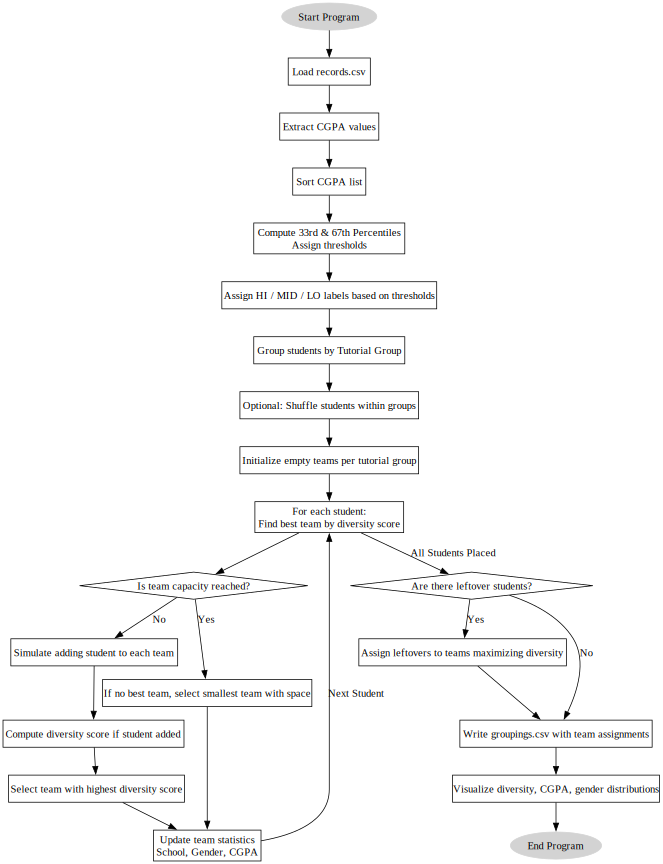

In [141]:
from graphviz import Digraph

flowchart = Digraph('Student_Grouping_Workflow', format='png')
flowchart.attr(rankdir='TB', size='12')

flowchart.node('Start', 'Start Program', shape='ellipse', style='filled', color='lightgrey')

flowchart.node('LoadCSV', 'Load records.csv', shape='box')
flowchart.node('ExtractCGPA', 'Extract CGPA values', shape='box')
flowchart.node('SortCGPA', 'Sort CGPA list', shape='box')
flowchart.node('ComputeThresholds', 'Compute 33rd & 67th Percentiles\nAssign thresholds', shape='box')
flowchart.node('AssignLabels', 'Assign HI / MID / LO labels based on thresholds', shape='box')
flowchart.node('GroupByTutorial', 'Group students by Tutorial Group', shape='box')

flowchart.node('OptionalShuffle', 'Optional: Shuffle students within groups', shape='box')

flowchart.node('InitTeams', 'Initialize empty teams per tutorial group', shape='box')

flowchart.node('PlaceStudents', 'For each student:\nFind best team by diversity score', shape='box')
flowchart.node('CheckCapacity', 'Is team capacity reached?', shape='diamond')
flowchart.node('SimulateAddition', 'Simulate adding student to each team', shape='box')
flowchart.node('CheckDiversity', 'Compute diversity score if student added', shape='box')
flowchart.node('SelectBestTeam', 'Select team with highest diversity score', shape='box')
flowchart.node('FallbackTeam', 'If no best team, select smallest team with space', shape='box')
flowchart.node('UpdateStats', 'Update team statistics\nSchool, Gender, CGPA', shape='box')

flowchart.node('LeftoversCheck', 'Are there leftover students?', shape='diamond')
flowchart.node('AssignLeftovers', 'Assign leftovers to teams maximizing diversity', shape='box')

flowchart.node('WriteCSV', 'Write groupings.csv with team assignments', shape='box')
flowchart.node('Visualize', 'Visualize diversity, CGPA, gender distributions', shape='box')

flowchart.node('End', 'End Program', shape='ellipse', style='filled', color='lightgrey')

flowchart.edge('Start', 'LoadCSV')
flowchart.edge('LoadCSV', 'ExtractCGPA')
flowchart.edge('ExtractCGPA', 'SortCGPA')
flowchart.edge('SortCGPA', 'ComputeThresholds')
flowchart.edge('ComputeThresholds', 'AssignLabels')
flowchart.edge('AssignLabels', 'GroupByTutorial')
flowchart.edge('GroupByTutorial', 'OptionalShuffle')
flowchart.edge('OptionalShuffle', 'InitTeams')
flowchart.edge('InitTeams', 'PlaceStudents')

flowchart.edge('PlaceStudents', 'CheckCapacity')
flowchart.edge('CheckCapacity', 'SimulateAddition', label='No')
flowchart.edge('CheckCapacity', 'FallbackTeam', label='Yes')
flowchart.edge('SimulateAddition', 'CheckDiversity')
flowchart.edge('CheckDiversity', 'SelectBestTeam')
flowchart.edge('SelectBestTeam', 'UpdateStats')
flowchart.edge('FallbackTeam', 'UpdateStats')
flowchart.edge('UpdateStats', 'PlaceStudents', label='Next Student')

flowchart.edge('PlaceStudents', 'LeftoversCheck', label='All Students Placed')
flowchart.edge('LeftoversCheck', 'AssignLeftovers', label='Yes')
flowchart.edge('LeftoversCheck', 'WriteCSV', label='No')
flowchart.edge('AssignLeftovers', 'WriteCSV')

flowchart.edge('WriteCSV', 'Visualize')
flowchart.edge('Visualize', 'End')

flowchart.render('student_grouping_flowchart_v2', view=True)
flowchart


# 2. Figures, Charts and Tables

In [142]:
def visualize_everything(rows, pseudo_out, weights=(0.5, 0.3, 0.2), sample_n_teams=12):
    try:
        from IPython import get_ipython
        ip = get_ipython()
        if ip: ip.run_line_magic("matplotlib", "inline")
    except Exception:
        pass

    import math, statistics
    from collections import Counter
    from IPython.display import display
    import matplotlib.pyplot as plt

    def _safe_div(a, b): return 0.0 if b == 0 else a / b
    def _std(vals):
        n = len(vals)
        if n <= 1: return 0.0
        mu = sum(vals)/n
        return math.sqrt(sum((v-mu)**2 for v in vals)/n)
    def _evenness(counts):
        total = sum(counts)
        if total <= 0: return 0.0
        ps = [c/total for c in counts if c > 0]
        if not ps: return 0.0
        gs = 1.0 - sum(p*p for p in ps)
        k = len(ps)
        return 0.0 if k <= 1 else gs/(1 - 1/k)
    def _group_bounds(rows_):
        b = {}
        for g, members in rows_.items():
            xs = [s.get("CGPA") for s in members]
            xs = [x for x in xs if isinstance(x, (int, float))]
            b[g] = (min(xs), max(xs)) if xs else (0.0, 0.0)
        return b
    def _cgpa_spread_evenness(team_vals, gmin, gmax):
        vals = [x for x in team_vals if isinstance(x, (int, float))]
        if len(vals) <= 1 or gmin == gmax: return 0.0
        rng = gmax - gmin
        zs = [(x - gmin)/rng for x in vals]
        return min(1.0, _safe_div(_std(zs), 0.5))
    def _diversity_score(team, gbounds, w=(0.5, 0.3, 0.2)):
        # if CGPA_vals missing/empty, reweight to school+gender
        w_school, w_gender, w_cgpa = w
        school_even = _evenness(Counter(team.get("School", [])).values())
        gender_even = _evenness(team.get("Gender", {}).values())
        gmin, gmax = gbounds
        cgvals = team.get("CGPA_vals", [])
        has_cg = bool(cgvals and any(isinstance(x, (int, float)) for x in cgvals))
        cg_even = _cgpa_spread_evenness(cgvals, gmin, gmax) if has_cg else 0.0
        if has_cg:
            ws, wg, wc = w_school, w_gender, w_cgpa
        else:
            total = (w_school + w_gender) or 1.0
            ws, wg, wc = w_school/total, w_gender/total, 0.0
        s = ws*school_even + wg*gender_even + wc*cg_even
        return max(0.0, min(1.0, s))

    if not isinstance(pseudo_out, dict) or not pseudo_out:
        print("[viz] pseudo_out is empty — nothing to plot.")
        return
    if not isinstance(rows, dict) or not rows:
        print("[viz] rows is empty — CGPA plots will be skipped.")

    bounds = _group_bounds(rows) if isinstance(rows, dict) else {}
    team_scores, team_sizes = [], []
    group_means, male_ratio_by_group = {}, {}
    all_cgpas = []

    if isinstance(rows, dict):
        for grp, members in rows.items():
            all_cgpas.extend([s.get("CGPA") for s in members if isinstance(s.get("CGPA"), (int, float))])

    for grp, teams in pseudo_out.items():
        gb = bounds.get(grp, (0.0, 0.0))
        scores = []
        for t in teams:
            scores.append(_diversity_score(t, gb))
            team_sizes.append(len(t.get("Student ID", [])))
        group_means[grp] = (sum(scores)/len(scores)) if scores else 0.0
        team_scores.extend(scores)
        m = sum(t.get("Gender", {}).get("Male", 0) for t in teams)
        f = sum(t.get("Gender", {}).get("Female", 0) for t in teams)
        male_ratio_by_group[grp] = _safe_div(m, m+f)

    print(f"[viz] groups={len(pseudo_out)}  teams={sum(len(v) for v in pseudo_out.values())}  "
          f"team_scores={len(team_scores)}  cgpas_in_rows={len(all_cgpas)}")

    # 1) Diversity per-team histogram
    if team_scores:
        mean_div = statistics.mean(team_scores)
        std_div  = statistics.pstdev(team_scores) if len(team_scores) < 2 else statistics.stdev(team_scores)
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.hist(team_scores, bins=20, edgecolor="black")
        ax.axvline(mean_div, linestyle="--", linewidth=2, label=f"Mean = {mean_div:.2f}")
        ax.axvline(mean_div+std_div, linestyle=":", linewidth=2, label=f"+1σ = {mean_div+std_div:.2f}")
        ax.axvline(mean_div-std_div, linestyle=":", linewidth=2, label=f"-1σ = {mean_div-std_div:.2f}")
        ax.set_title("Diversity Score Distribution (per team)")
        ax.set_xlabel("Diversity Score"); ax.set_ylabel("Frequency"); ax.legend()
        fig.tight_layout(); 
        display(fig);
        fig.savefig("diversity_score_distribution.png") 

    # 2) Mean diversity per tutorial group
    if group_means:
        vals = list(group_means.values())
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.hist(vals, bins=20, edgecolor="black")
        ax.set_title("Per-Group Mean Diversity")
        ax.set_xlabel("Diversity Score"); ax.set_ylabel("Number of Tutorial Groups")
        fig.tight_layout(); 
        display(fig);
        fig.savefig("per_group_mean_diversity.png") 

    # 3) Team size vs diversity
    if team_scores and team_sizes:
        fig, ax = plt.subplots(figsize=(7, 5))
        ax.scatter(team_sizes, team_scores, alpha=0.7)
        ax.set_xlabel("Team Size"); ax.set_ylabel("Diversity Score")
        ax.set_title("Team Size vs Diversity Score"); ax.grid(True, linestyle="--", alpha=0.5)
        fig.tight_layout(); 
        display(fig);
        fig.savefig("team_size_vs_diversity_size.png") 

    # 4) Male ratio per tutorial group
    mr_vals = list(male_ratio_by_group.values())
    if mr_vals:
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.hist(mr_vals, bins=20, edgecolor="black")
        ax.set_title("Male Ratio per Tutorial Group")
        ax.set_xlabel("Proportion Male"); ax.set_ylabel("Number of Groups")
        fig.tight_layout(); 
        display(fig);
        fig.savefig("male_ratio_tutorial_group.png") 

    # 5) Overall CGPA histogram 
    if all_cgpas:
        fig, ax = plt.subplots(figsize=(7, 4))
        ax.hist(all_cgpas, bins=30, edgecolor="black")
        ax.set_title("Overall CGPA Distribution (All Students)")
        ax.set_xlabel("CGPA"); ax.set_ylabel("Count")
        fig.tight_layout(); 
        display(fig);
        fig.savefig("overall_cgpa_distribution.png") 

    # 6) gender composition
    labels, male_p, female_p = [], [], []
    picked = 0
    for grp, teams in pseudo_out.items():
        for i, t in enumerate(teams, 1):
            if picked >= sample_n_teams: break
            label = f"{grp}-{i:02d}"
            n = max(1, len(t.get("Student ID", [])))
            m = t.get("Gender", {}).get("Male", 0)
            f = t.get("Gender", {}).get("Female", 0)
            labels.append(label)
            male_p.append(_safe_div(m, n)); female_p.append(_safe_div(f, n))
            picked += 1
        if picked >= sample_n_teams: break

    if labels:
        x = list(range(len(labels)))
        fig, ax = plt.subplots(figsize=(max(8, 0.6*len(labels)), 4.5))
        ax.bar(x, male_p, label="Male")
        ax.bar(x, female_p, bottom=male_p, label="Female")
        ax.set_xticks(x); ax.set_xticklabels(labels, rotation=45, ha="right")
        ax.set_ylabel("Proportion"); ax.set_title("Gender Proportion (Sample Teams)")
        ax.legend()
        fig.tight_layout(); 
        display(fig);
        fig.savefig("gender_proportion.png") 

    # 7) Boxplot of Diversity Scores 
    if team_scores:
        boxprops = dict(facecolor='lightblue', edgecolor='black', linewidth=1.5)
        medianprops = dict(color='darkblue', linewidth=2)
        whiskerprops = dict(color='darkblue', linewidth=1.5)
        capprops = dict(color='darkblue', linewidth=1.5)
        flierprops = dict(marker='o', markerfacecolor='red', markersize=5, markeredgecolor='none')
        
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.boxplot(team_scores, 
                   notch=True, vert=True, patch_artist=True,
                   boxprops=boxprops,
                   medianprops=medianprops,
                   whiskerprops=whiskerprops,
                   capprops=capprops,
                   flierprops=flierprops)
        ax.set_title("Boxplot of Diversity Scores per Team", fontsize=14)
        ax.set_ylabel("Diversity Score", fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        fig.tight_layout()
        display(fig)
        fig.savefig("boxplot_diversity_scores.png")
    
    # 8) Boxplot of CGPA per tutorial group
    if isinstance(rows, dict) and rows:
        # Limit groups to max 15 to reduce clutter
        max_groups = 15
        groups = list(rows.keys())[:max_groups]
        data_for_boxplot = []
        for grp in groups:
            cgpas = [s.get("CGPA") for s in rows[grp] if isinstance(s.get("CGPA"), (int, float))]
            data_for_boxplot.append(cgpas if cgpas else [0])
        
        boxprops = dict(facecolor='lightgreen', edgecolor='black', linewidth=1.5)
        medianprops = dict(color='darkgreen', linewidth=2)
        whiskerprops = dict(color='darkgreen', linewidth=1.5)
        capprops = dict(color='darkgreen', linewidth=1.5)
        flierprops = dict(marker='d', markerfacecolor='orange', markersize=6, markeredgecolor='none')
        
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.boxplot(data_for_boxplot, tick_labels=groups, notch=True, vert=False, patch_artist=True,
                   boxprops=boxprops,
                   medianprops=medianprops,
                   whiskerprops=whiskerprops,
                   capprops=capprops,
                   flierprops=flierprops)
        ax.set_title("Boxplot of CGPA Distribution per Tutorial Group (Top 15)", fontsize=14)
        ax.set_xlabel("CGPA", fontsize=12)
        ax.set_ylabel("Tutorial Group", fontsize=12)
        ax.grid(axis='x', linestyle='--', alpha=0.5)
        fig.tight_layout()
        display(fig)
        fig.savefig("boxplot_cgpa_per_group.png")

[viz] groups=120  teams=1200  team_scores=1200  cgpas_in_rows=6000


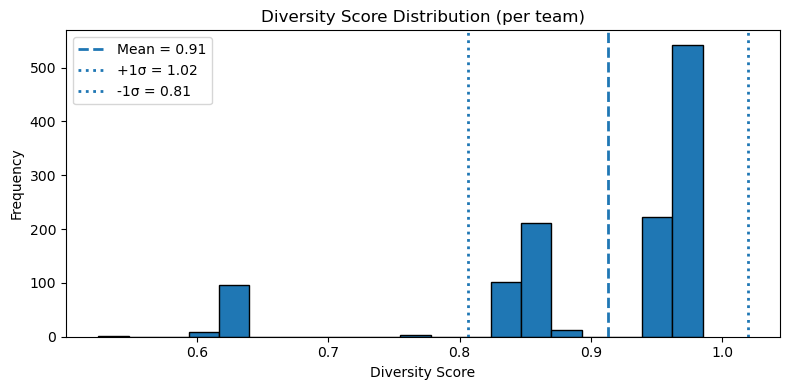

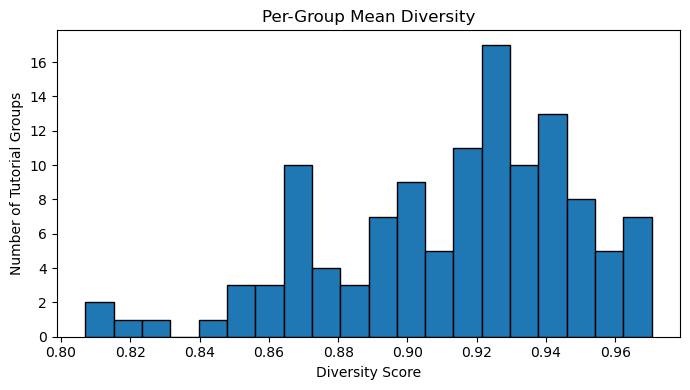

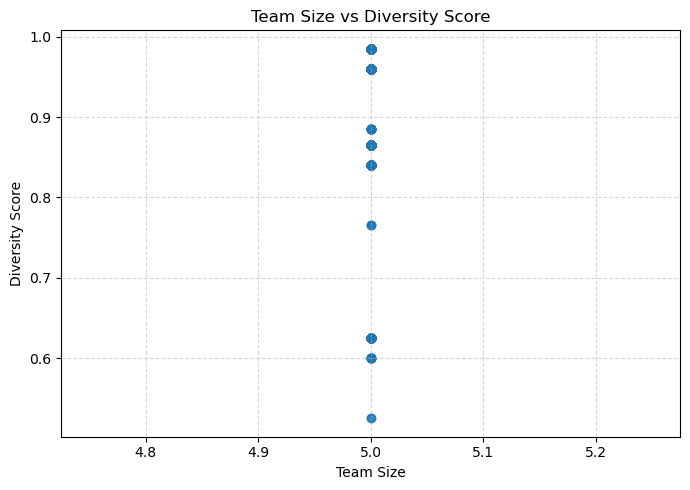

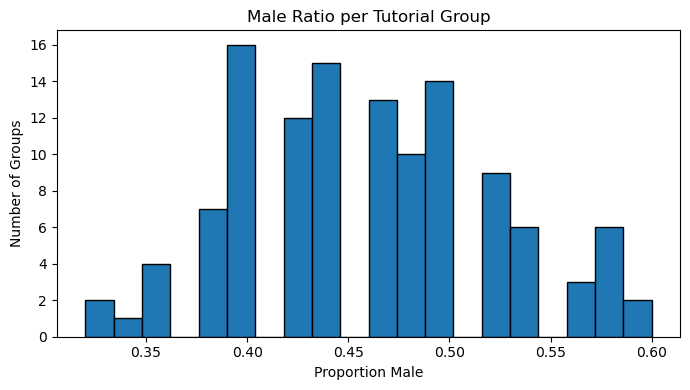

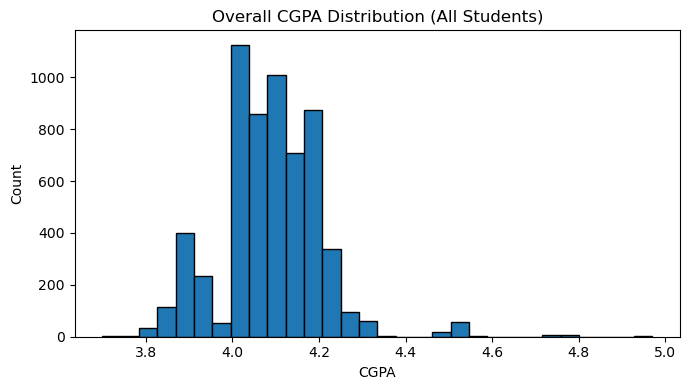

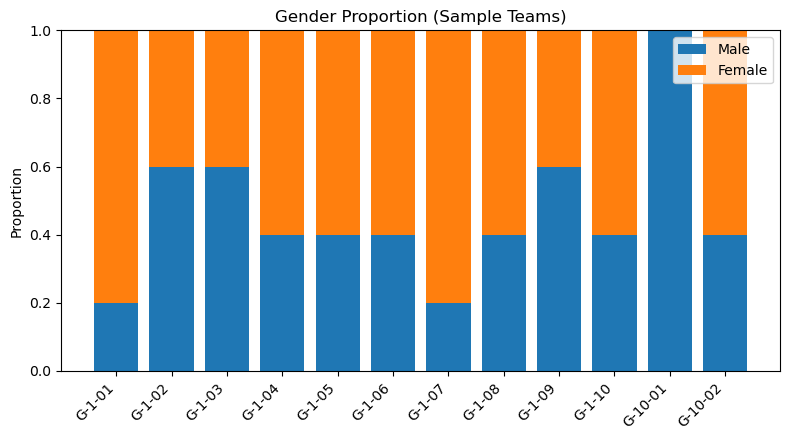

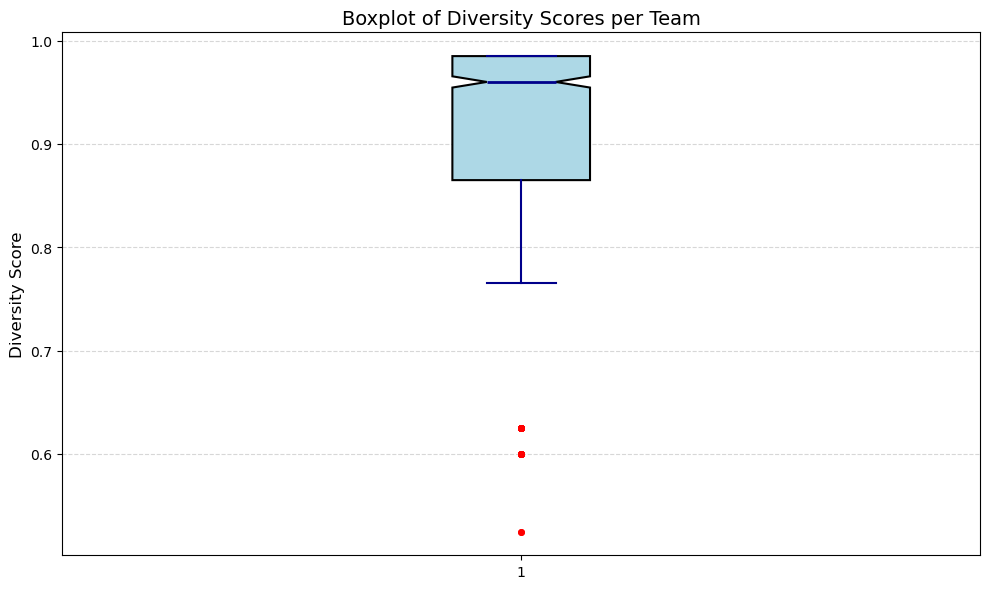

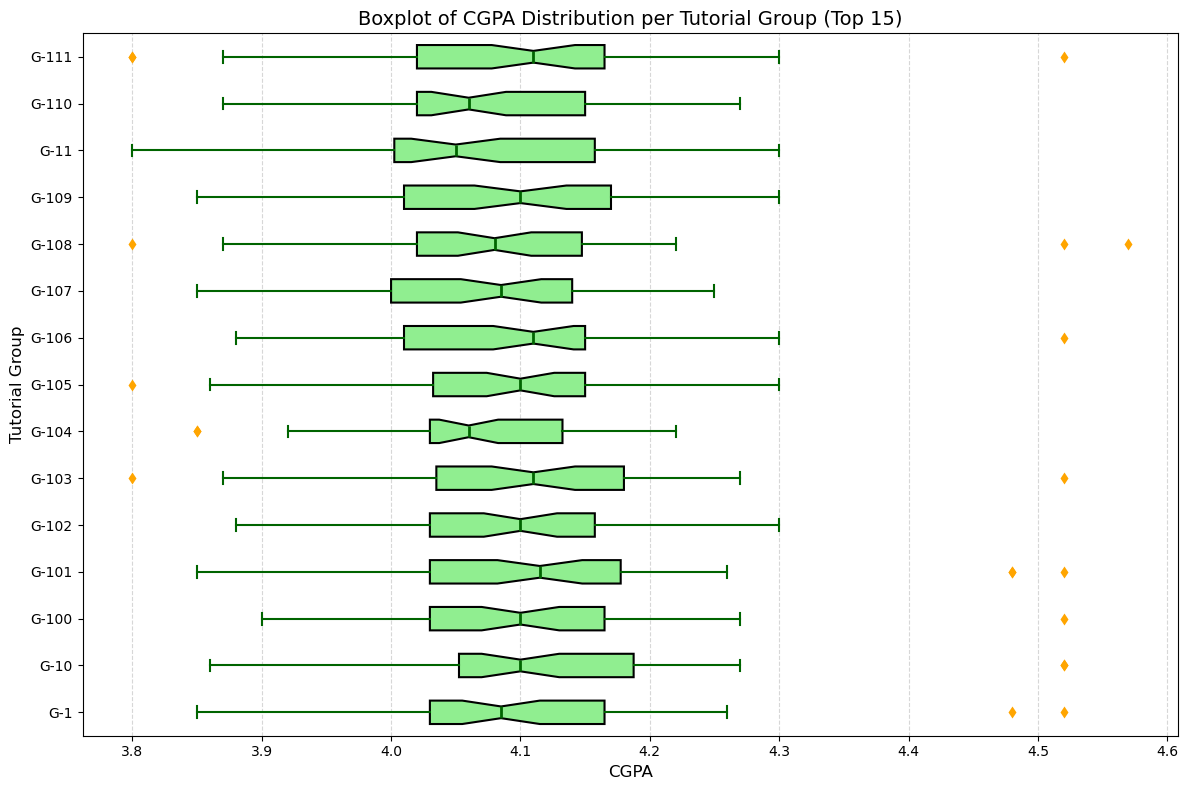

In [143]:
visualize_everything(rows, pseudo_out, weights=(0.5, 0.3, 0.2), sample_n_teams=12)

# 3. Challenges and issues

- Handling Large Data Without Pandas/Numpy
    - Without `pandas`, operations like filtering, grouping, and sorting must be done manually, increasing the chances of logic errors especially with large data set (`records.csv`).  

- Designing an Effective Team Allocation Algorithm
    - The program must balance **three criteria simultaneously:  
      1. School diversity  
      2. Gender balance  
      3. CGPA mix (HI, MID, LO)  
    - When multiple teams have similar scores, deciding the "best" team adds complexity.

- Determining CGPA Boundaries Automatically
- Students must be divided into HI, MID, and LO tiers using 33rd and 67th percentiles.  
- Since statistical libraries are not allowed, these percentiles must be calculated manually from sorted lists.  
- Small rounding or indexing errors can cause uneven or inconsistent grouping.

- Managing Nested Data Structures
- Data is stored in nested dictionaries of lists
- Frequent updates and lookups in these nested structures can easily lead to key errors or incorrect data updates.  
- Keeping track of data consistency is challenging.

- Algorithm Evaluation and Visualization
- Calculations and visualizations must rely on manual data aggregation and basic matplotlib plotting which require much extra effort.  

# **4. Conclusion**

In this project, we have successfully conceptualized, designed, and implemented a Team Allocation Simulator that intelligently forms balanced and diverse student teams based on School, Gender, and CGPA. The system ensures fairness and consistency across tutorial groups while maintaining full automation and data integrity without relying on external data manipulation libraries.

Through this process, we effectively applied core computational thinking principles, including decomposition, pattern recognition, and abstraction to structure a complex allocation problem into clear, modular components. Each function within the program was purposefully designed to handle distinct responsibilities, reflecting a strong emphasis on algorithmic design and logical efficiency.

This project demonstrates our ability to translate real-world constraints into a systematic computational solution, showcasing how data-driven algorithms can achieve equitable and optimized team formations.  

For future enhancement, the simulator can be extended with interactive user inputs (e.g., adjustable team sizes using `ipywidgets`) and further algorithmic optimization to handle even larger datasets or additional diversity criteria with improved precision.

# Generation of Requirements.txt file

In [144]:
!pip freeze > requirements.txt